# <font color=black> Analysis - ICA vs iCAP in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different methods and datasets.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_
    * Analysis of spatial similarity (for a single K, or across multiple Ks)
    * Distribution across axial subdvisions (D,V,L,R) for different Ks

In [106]:
import sys,json

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from plotting import Plotting
from spine_only_analysis_RSduration import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization

### Load configuration file 

In [115]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_NK.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Create instance of class

In [120]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':5, 'dataset':'gva', 'analysis':'icap_duration', 'duration':'2min'}
params_qual_2 = {'k':5, 'dataset':'gva', 'analysis':'icap'}

plotting = Plotting(config,'spinalcord',params1=params_qual_1)
#plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)

### Visualizing components
_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

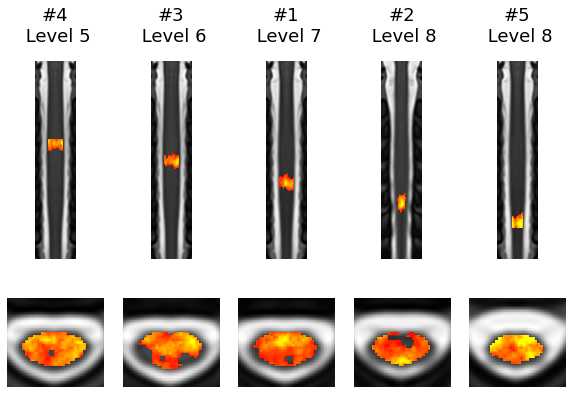

In [121]:
plotting.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=1.5, uthresh=4, save_results=True, similarity_method='Dice')

# Quantitative analyses

## Within-dataset comparison

### `GVA` dataset

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

In [52]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'ica'}
params_quant_gva_2 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2` if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs gva_icap at K = 5 

The mean similarity is 0.33


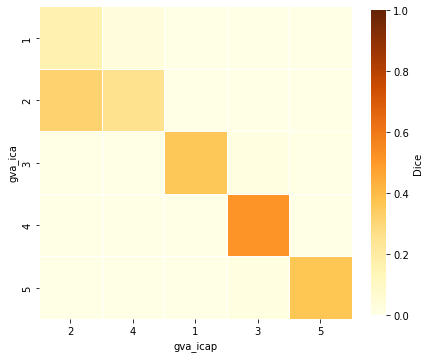

In [19]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 10 vs gva_icap at K = 10 

The mean similarity is 0.42


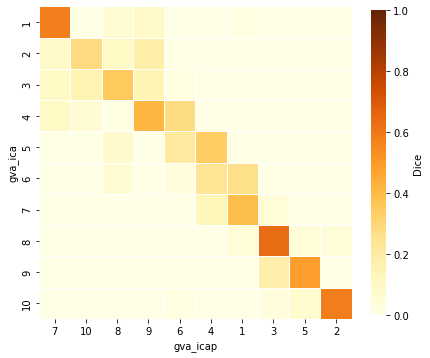

In [20]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=10,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs gva_icap at K = 20 

The mean similarity is 0.47


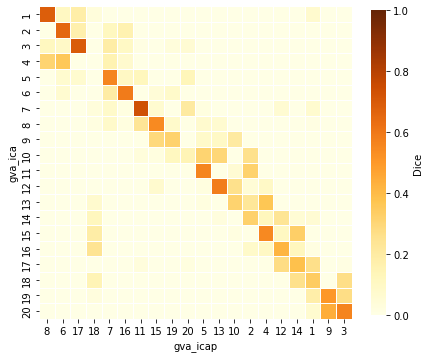

In [21]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=20,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs gva_icap at K = 20 

The mean similarity is 0.47


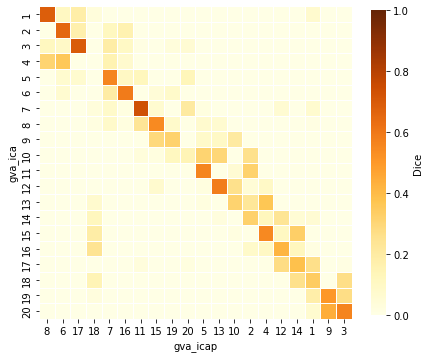

In [10]:
spine_analysis_gva.spatial_similarity(k1=1,similarity_method='Dice')

Z threshold: 1.5
METHOD 2: Comparing two sets of components across K values


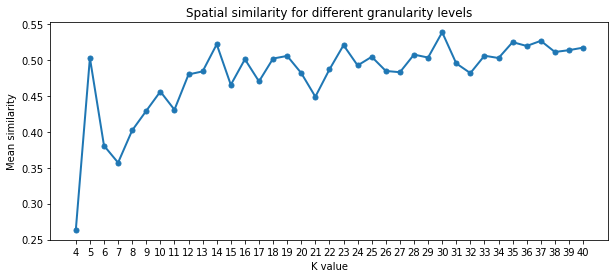

In [17]:
spine_analysis_gva.spatial_similarity(k_range=range(4,41),thresh=1.5, similarity_method='Dice', verbose=False)

Z threshold: 2
METHOD 2: Comparing two sets of components across K values


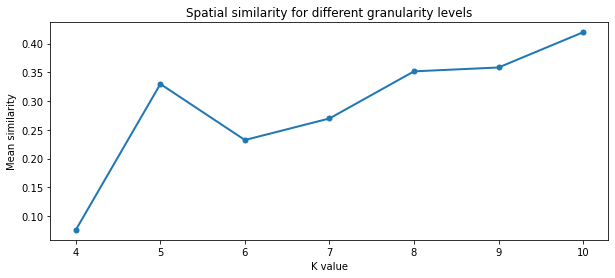

In [31]:
spine_analysis_gva.spatial_similarity(k_range=range(4,11),thresh=2, similarity_method='Dice', verbose=False)

### Investigate axial distribution for different Ks

#### Distributions seem a bit different: <font color=red> => TO EXPLORE </font>
- ICA: a lot of LR subdivisions early on
- iCAP: mostly DV </br>

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_ica 
 ––– Range: range(4, 41) 
 ––– % for matching: 70  
 ––– Z threshold: 2
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


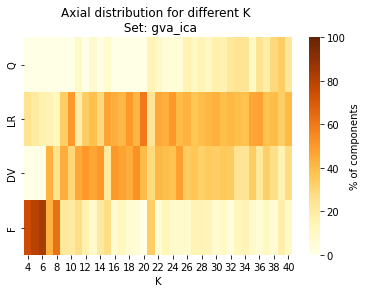

In [53]:
distribution_gva_ica = spine_analysis_gva.k_axial_distribution(spine_analysis_gva.name1, thresh=2, vox_percentage=70, verbose=False)

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_icap 
 ––– Range: range(4, 41) 
 ––– % for matching: 70  
 ––– Z threshold: 2
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


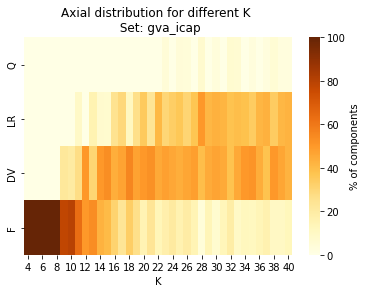

In [55]:
distribution_gva_icap = spine_analysis_gva.k_axial_distribution(spine_analysis_gva.name2, thresh=2, vox_percentage=70, verbose=False)

### `MTL` dataset

### Instantiate class

In [56]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_mtl_1 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'ica'}
params_quant_mtl_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_mtl = SpineOnlyAnalysis(config,params1=params_quant_mtl_1,params2=params_quant_mtl_2)

### Analyze spatial similarity

#### Matching is a bit better for low K, and still good for high K!

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_icap at K = 9 

The mean similarity is 0.71


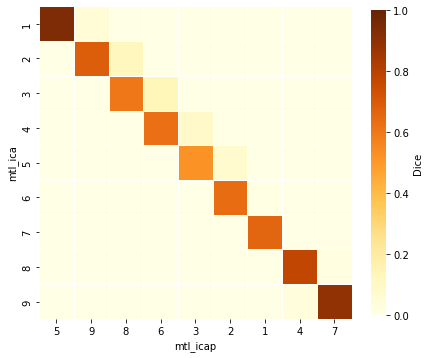

In [23]:
spine_analysis_mtl.spatial_similarity(k1=9,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 18 vs mtl_icap at K = 18 

The mean similarity is 0.58


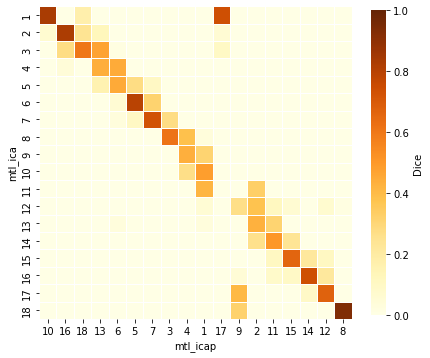

In [24]:
spine_analysis_mtl.spatial_similarity(k1=18,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 36 vs mtl_icap at K = 36 

The mean similarity is 0.57


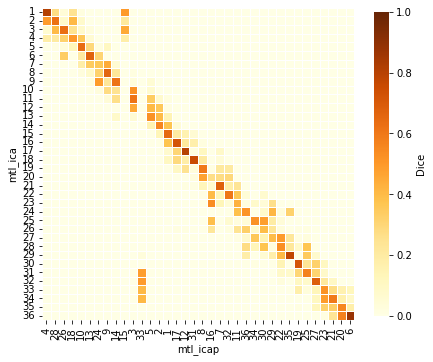

In [25]:
spine_analysis_mtl.spatial_similarity(k1=36,similarity_method='Dice')

Z threshold: 2
METHOD 2: Comparing two sets of components across K values


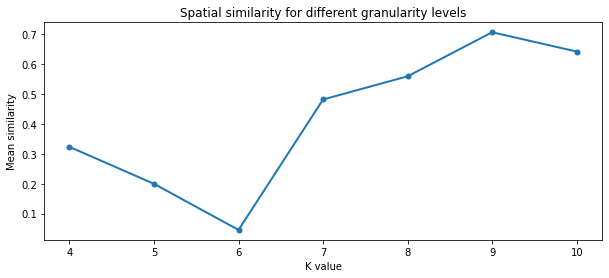

In [30]:
spine_analysis_mtl.spatial_similarity(k_range=range(4,11),thresh=2,similarity_method='Dice', verbose=False)

### Investigate axial distribution for different Ks

#### Distributions seem a bit different: <font color=red> => TO EXPLORE </font>
- ICA: LR subdivisions early on
- iCAP: mostly DV </br>

_Note: here, no Q subdivisions... is it because we have more levels or because of the lower resolution?_

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: mtl_ica 
 ––– Range: range(4, 41) 
 ––– % for matching: 70  
 ––– Z threshold: 2
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


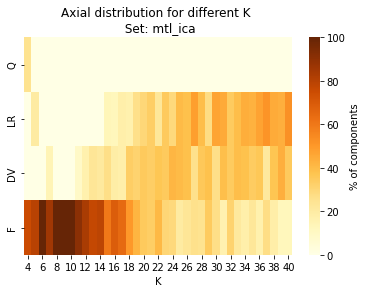

In [57]:
distribution_mtl_ica = spine_analysis_mtl.k_axial_distribution(spine_analysis_mtl.name1, thresh=2, vox_percentage=70, verbose=False)

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: mtl_icap 
 ––– Range: range(4, 41) 
 ––– % for matching: 70  
 ––– Z threshold: 2
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


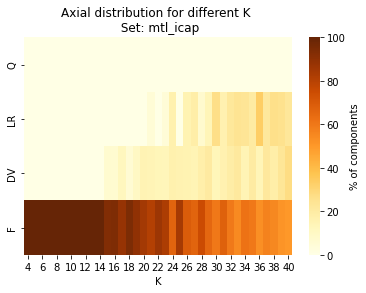

In [58]:
distribution_mtl_icap = spine_analysis_mtl.k_axial_distribution(spine_analysis_mtl.name2, thresh=2, vox_percentage=70, verbose=False)

## Between-dataset comparison

### `ICA` method

### Instantiate class

In [26]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_ica_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'ica'}
params_quant_ica_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'ica'}

spine_analysis_ica = SpineOnlyAnalysis(config,params1=params_quant_ica_1,params2=params_quant_ica_2)

### Analyze spatial similarity

#### Very bad for low K, good for higher!
Note: here I have chosen $K \times 2$ for `mtl` compared to `gva`, to match the difference in spinal levels that are covered.

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs mtl_ica at K = 9 

The mean similarity is 0.38


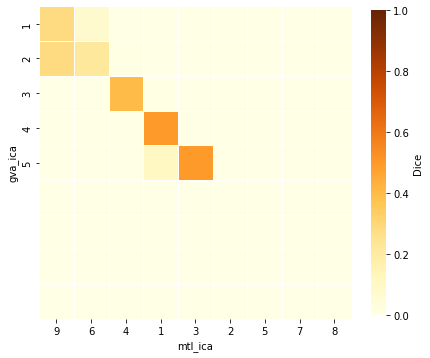

In [27]:
spine_analysis_ica.spatial_similarity(k1=5,k2=9,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 10 vs mtl_ica at K = 18 

The mean similarity is 0.40


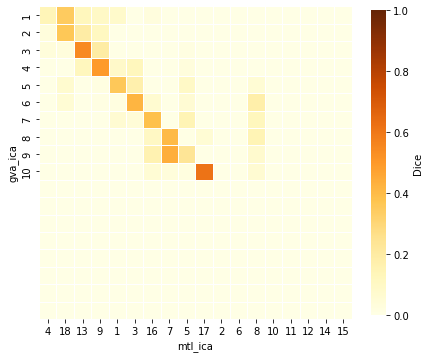

In [29]:
spine_analysis_ica.spatial_similarity(k1=10,k2=18,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs mtl_ica at K = 36 

The mean similarity is 0.45


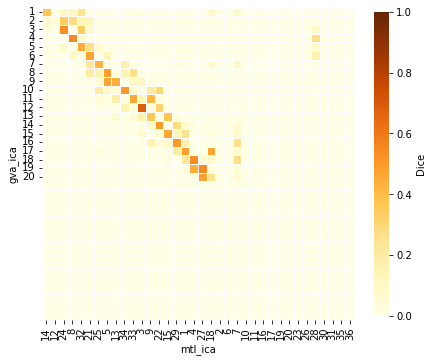

In [28]:
spine_analysis_ica.spatial_similarity(k1=20,k2=36,similarity_method='Dice')

### `iCAP` method

### Instantiate class

In [8]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 5 vs mtl_icap at K = 9 

The mean similarity is 0.65


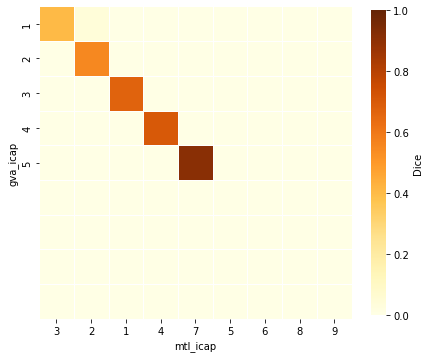

In [9]:
spine_analysis_icap.spatial_similarity(k1=5,k2=9,similarity_method='Dice')

Z threshold taken from config file.
METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 36 

The mean similarity is 0.58


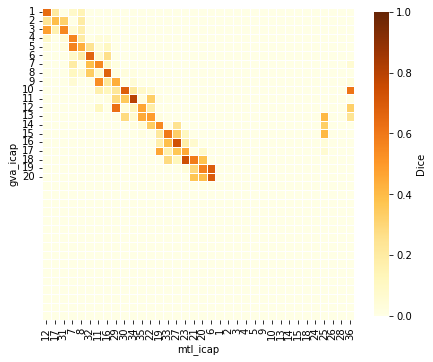

In [10]:
spine_analysis_icap.spatial_similarity(k1=20,k2=36,similarity_method='Dice')

In [ ]:
x